<a href="https://colab.research.google.com/github/AnufrievSY/computer_vision/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install face_recognition
import face_recognition
from google.colab.patches import cv2_imshow
import cv2
import pickle
import os
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def loading_image(path, color):
  if color == 'grey':
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  elif color == 'rgb':
    image = cv2.imread(path, cv2.IMREAD_COLOR)
  return image

def crop_image(number):
  x_n = number if number < 5 else number - 4
  y_n = 0 if number < 5 else 1
  x_1 = int(img.shape[1]/4) * (x_n - 1)
  x_2 = int(img.shape[1]/4) * x_n
  y_1 = int(img.shape[0]/2) * y_n 
  y_2 = int(img.shape[0]/2) * (y_n + 1)

  crop_image = img[y_1:y_2, x_1:x_2]
  return crop_image

In [ ]:
img = loading_image('test_image', 'rgb')
my_face = crop_image(2)
my_face_boxes = face_recognition.face_locations(my_face, model='hog')
my_face_encodings = face_recognition.face_encodings(my_face, my_face_boxes)


face_0 вероятность совпадения: 75.94087 %


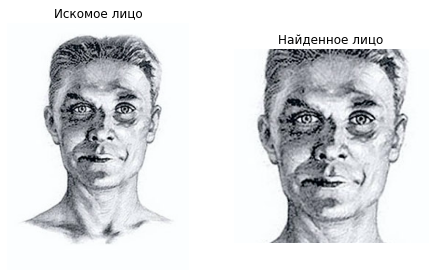

In [ ]:
# Находим путь к xml-файлу, содержащему файл haarcascade (каскад Хаара для обнаружения лиц)
cascPathface = os.path.dirname(cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"
# Инициализируем каскадный классификатор (по умолчанию передаем каскад Хаара)
faceCascade = cv2.CascadeClassifier(cascPathface)
# Загружаем известное лицо и эмбеддинги, полученые ранее
#data = pickle.loads(open('face_enc', "rb").read())

# Инициализируем функцию поиска лиц 
faces = faceCascade.detectMultiScale(
    # Для каскадного классификатора Хаара необходимо загрузить изображение в оттенках серого, т.к. алгоритм лучше работает с черно-белым изображением.
    loading_image('test_image', 'grey'), 
    # Параметр, указывающий, на сколько уменьшается размер изображения при каждом масштабе изображения. Он используется для создания масштабной пирамиды. 
    scaleFactor=1.1,
    # Параметр, указывающий, сколько соседей должен иметь каждый прямоугольник-кандидат для его сохранения. (чем выше , тем больше точность).  
    minNeighbors=4,
    # Минимально возможный размер объекта. Объекты меньшего размера игнорируются. 
    minSize=(50, 50),
    # Обозначаем метод для поиска лица (в новых версиях так называется каскад Хаара)
    flags=cv2.CASCADE_SCALE_IMAGE)

pic_box = plt.figure(figsize=(16,10))
pic_box.add_subplot(2,4,1)
plt.imshow(my_face)
plt.title('Искомое лицо')
plt.axis('off')

faces_img = loading_image('test_image', 'rgb')
for i, (x, y, w, h) in enumerate(faces):
  find_face = faces_img[y:y+h, x:x+w]
  find_face_boxes = face_recognition.face_locations(find_face, model='hog')
  find_face_encodings = face_recognition.face_encodings(find_face, find_face_boxes)
  # определяем какие из лиц совпадают
  check_result = face_recognition.compare_faces(my_face_encodings, find_face_encodings[0], tolerance = 0.3)
  # находим евклидово расстояние для каждого сравниваемого лица
  check_dastance = face_recognition.face_distance(my_face_encodings, find_face_encodings[0])
  if True in check_result:
    print(f'face_{i} вероятность совпадения: {((1 - check_dastance[0])*100).round(5)} %')
    pic_box.add_subplot(2,4,2)
    plt.imshow(faces_img[y: y+h, x: x+w])
    plt.title('Найденное лицо', y = 1)
    plt.axis('off')

plt.show()  


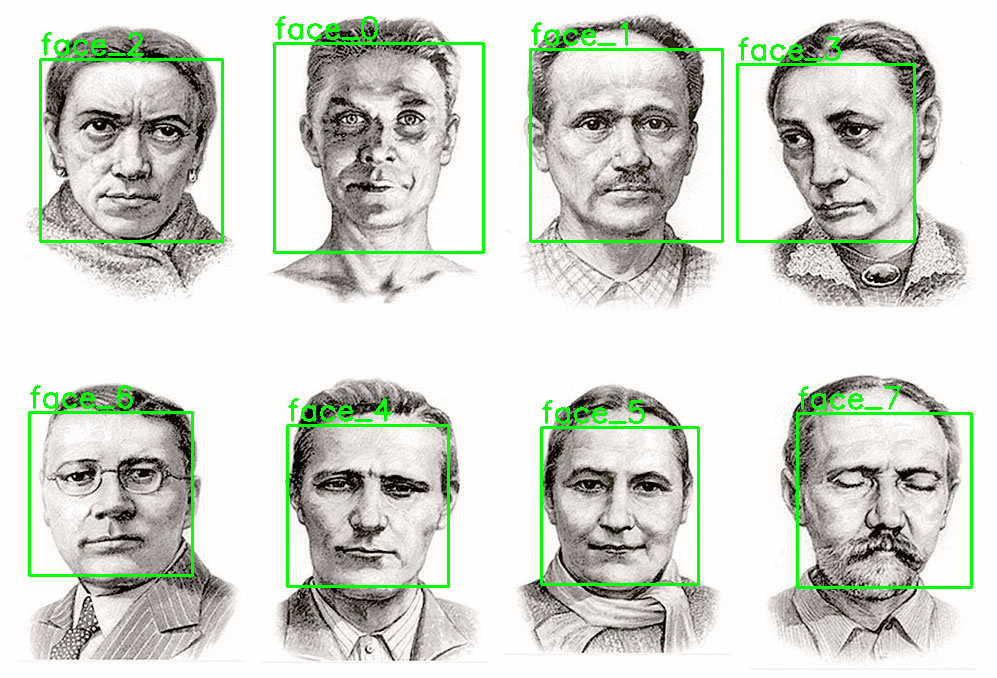

In [ ]:
faces_image = loading_image('test_image', 'rgb')
# Находим путь к xml-файлу, содержащему файл haarcascade (каскад Хаара для обнаружения лиц)
cascPathface = os.path.dirname(cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"
# Инициализируем каскадный классификатор (по умолчанию передаем каскад Хаара)
faceCascade = cv2.CascadeClassifier(cascPathface)
# Инициализируем функцию поиска лиц 
faces = faceCascade.detectMultiScale(
    # Для каскадного классификатора Хаара необходимо загрузить изображение в оттенках серого, т.к. алгоритм лучше работает с черно-белым изображением.
    loading_image('test_image', 'grey'), 
    # Параметр, указывающий, на сколько уменьшается размер изображения при каждом масштабе изображения. Он используется для создания масштабной пирамиды. 
    scaleFactor=1.1,
    # Параметр, указывающий, сколько соседей должен иметь каждый прямоугольник-кандидат для его сохранения. (чем выше , тем больше точность).  
    minNeighbors=4,
    # Минимально возможный размер объекта. Объекты меньшего размера игнорируются. 
    minSize=(50, 50),
    # Обозначаем метод для поиска лица (в новых версиях так называется каскад Хаара)
    flags=cv2.CASCADE_SCALE_IMAGE)

for i, (x, y, w, h) in enumerate(faces):
  faces_image = cv2.rectangle(faces_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
  faces_image = cv2.putText(faces_image,f'face_{i}', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, 2)


cv2_imshow(faces_image)

In [ ]:
source_img = loading_image('/content/drive/MyDrive/Colab Notebooks/керамика.jpg', 'grey')
check_img = loading_image('/content/drive/MyDrive/Colab Notebooks/примеры пород.jpg', 'grey')

In [ ]:
# Находим путь к xml-файлу, содержащему файл haarcascade (каскад Хаара для обнаружения лиц)
cascPath= '/content/drive/MyDrive/Colab Notebooks/cascade.xml'
# Инициализируем каскадный классификатор (по умолчанию передаем каскад Хаара)
Cascade = cv2.CascadeClassifier(cascPath)
# Инициализируем функцию поиска лиц 
objects = Cascade.detectMultiScale(
    # Для каскадного классификатора Хаара необходимо загрузить изображение в оттенках серого, т.к. алгоритм лучше работает с черно-белым изображением.
    source_img, 
    # Параметр, указывающий, на сколько уменьшается размер изображения при каждом масштабе изображения. Он используется для создания масштабной пирамиды. 
    scaleFactor=1.2,
    # Параметр, указывающий, сколько соседей должен иметь каждый прямоугольник-кандидат для его сохранения. (чем выше , тем больше точность).  
    minNeighbors=10,
    # Минимально возможный размер объекта. Объекты меньшего размера игнорируются. 
    minSize=(200, 200),
    # Обозначаем метод для поиска лица (в новых версиях так называется каскад Хаара)
    flags=cv2.CASCADE_SCALE_IMAGE)
len(objects)

8

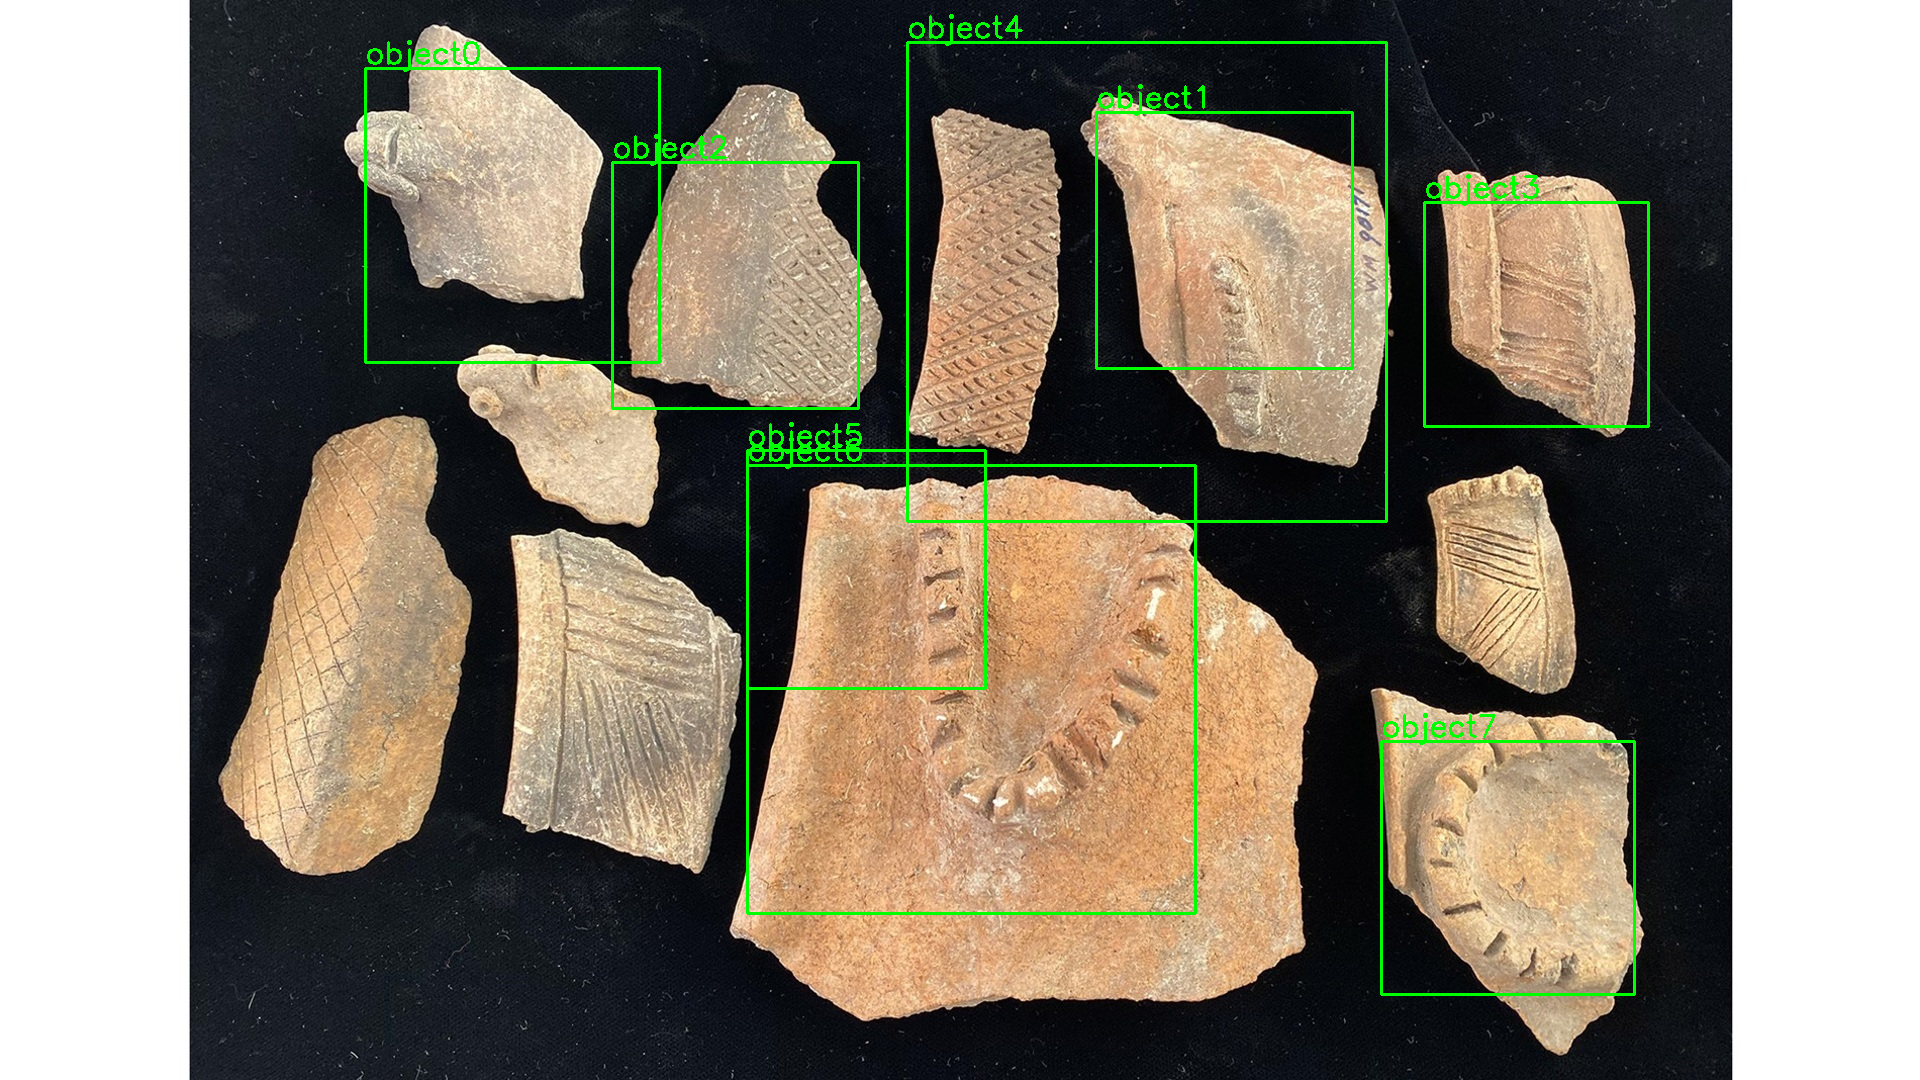

In [ ]:
source_img = loading_image('/content/drive/MyDrive/Colab Notebooks/керамика.jpg', 'rgb')
for i, (x, y, w, h) in enumerate(objects):
  source_img = cv2.rectangle(source_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
  source_img = cv2.putText(source_img, f'object{i}', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, 2)


cv2_imshow(source_img)

In [ ]:
source_img = loading_image('/content/drive/MyDrive/Colab Notebooks/керамика.jpg', 'grey')
for i in range(1, 11):
  cv2.imwrite(f'/content/drive/MyDrive/Colab Notebooks/pos/img_{i}.jpg', source_img)

In [ ]:
# создание анотации
opencv_annotation.exe --annotations=pos.txt --images=positive/
# создание векторов
opencv_createsamples.exe -info pos.txt -w 24 -h 24 -num 1000 -vec pos.vec
# тренировка
opencv_traincascade.exe -data cascade/ -vec pos.vec -bg neg.txt -numPos 200 -numNeg 100 -numStages 10 -w 24 -h 24

$ C:/Users/Ben/learncodebygaming/opencv/build/x64/vc15/bin/opencv_traincascade.exe -data cascade/ -vec pos.vec -bg neg.txt -numPos 200 -numNeg 100 -numStages 10 -w 24 -h 24